In [ ]:
Q 1) Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [4]:
import pandas as pd
import numpy as np

In [5]:
sales = pd.read_csv("Company_Data.csv")

In [6]:
sales.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [7]:
# converting continuous values into categorical values
sales["Sales"] = pd.cut(sales.Sales, bins =3 , labels = ['low','medium','high'])

In [8]:
sales

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0    medium        138      73           11         276    120       Bad   42   
1      high        111      48           16         260     83      Good   65   
2    medium        113      35           10         269     80    Medium   59   
3    medium        117     100            4         466     97    Medium   55   
4       low        141      64            3         340    128       Bad   38   
..      ...        ...     ...          ...         ...    ...       ...  ...   
395    high        138     108           17         203    128      Good   33   
396  medium        139      23            3          37    120    Medium   55   
397  medium        162      26           12         368    159    Medium   40   
398  medium        100      79            7         284     95       Bad   50   
399  medium        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

In [9]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
sales['Sales'] = encode.fit_transform(sales['Sales'])
sales['ShelveLoc'] = encode.fit_transform(sales['ShelveLoc'])
sales['Urban'] = encode.fit_transform(sales['Urban'])
sales['US'] = encode.fit_transform(sales['US'])

In [10]:
sales

Sales  CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        2        138      73           11         276    120          0   42   
1        0        111      48           16         260     83          1   65   
2        2        113      35           10         269     80          2   59   
3        2        117     100            4         466     97          2   55   
4        1        141      64            3         340    128          0   38   
..     ...        ...     ...          ...         ...    ...        ...  ...   
395      0        138     108           17         203    128          1   33   
396      2        139      23            3          37    120          2   55   
397      2        162      26           12         368    159          2   40   
398      2        100      79            7         284     95          0   50   
399      2        134      37            0          27    120          1   49   

     Education  Urban  US  
0           17      1   1  
1           10      1   1  
2           12      1   1  
3           14      1   1  
4           13      1   0  
..         ...    ...  ..  
395         14      1   1  
396         11      0   1  
397         18      1   1  
398         12      1   1  
399         16      1   1  

[400 rows x 11 columns]

In [11]:
# def level(sales):
#     if sales <=5.0:
#         return "low"
#     elif (sales > 5.0 and sales <= 10.5):
#         return "medium"
#     else:
#         return "high"

In [12]:
#sales["slevel"]= sales["Sales"].apply(level)

In [13]:
# Splitting data into X,Y
x = sales.iloc[:,1:]
y = sales.iloc[:,0]  

In [14]:
# PREPARING MODEL

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [16]:
# fitting model
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=30, random_state=0)

In [17]:
model = DecisionTreeClassifier()
model = model.fit(x_train,y_train)

In [18]:
model

DecisionTreeClassifier()

In [19]:
# predicting the model with x_test
y_pred = model.predict(x_test)

In [20]:
from sklearn.metrics import accuracy_score,classification_report

In [21]:
acuuracy = accuracy_score(y_test,y_pred)
print('Accuracy:',acuuracy*100)

Accuracy: 53.333333333333336


In [22]:
cls_report = classification_report(y_test,y_pred)
print(cls_report)

              precision    recall  f1-score   support

           0       0.33      0.33      0.33         3
           1       0.46      0.67      0.55         9
           2       0.64      0.50      0.56        18

    accuracy                           0.53        30
   macro avg       0.48      0.50      0.48        30
weighted avg       0.56      0.53      0.53        30



In [23]:
from sklearn import tree
from sklearn.tree import plot_tree

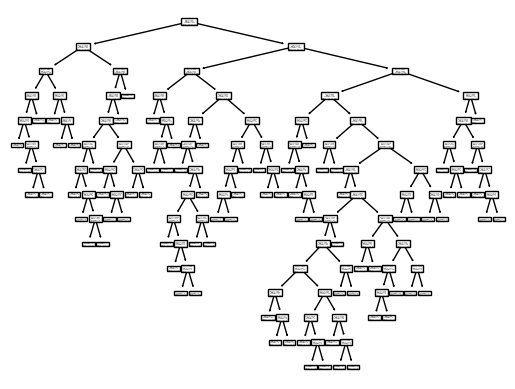

In [24]:
tree=plot_tree(model)

In [25]:
# model build with Entropy

In [26]:
model1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = None)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

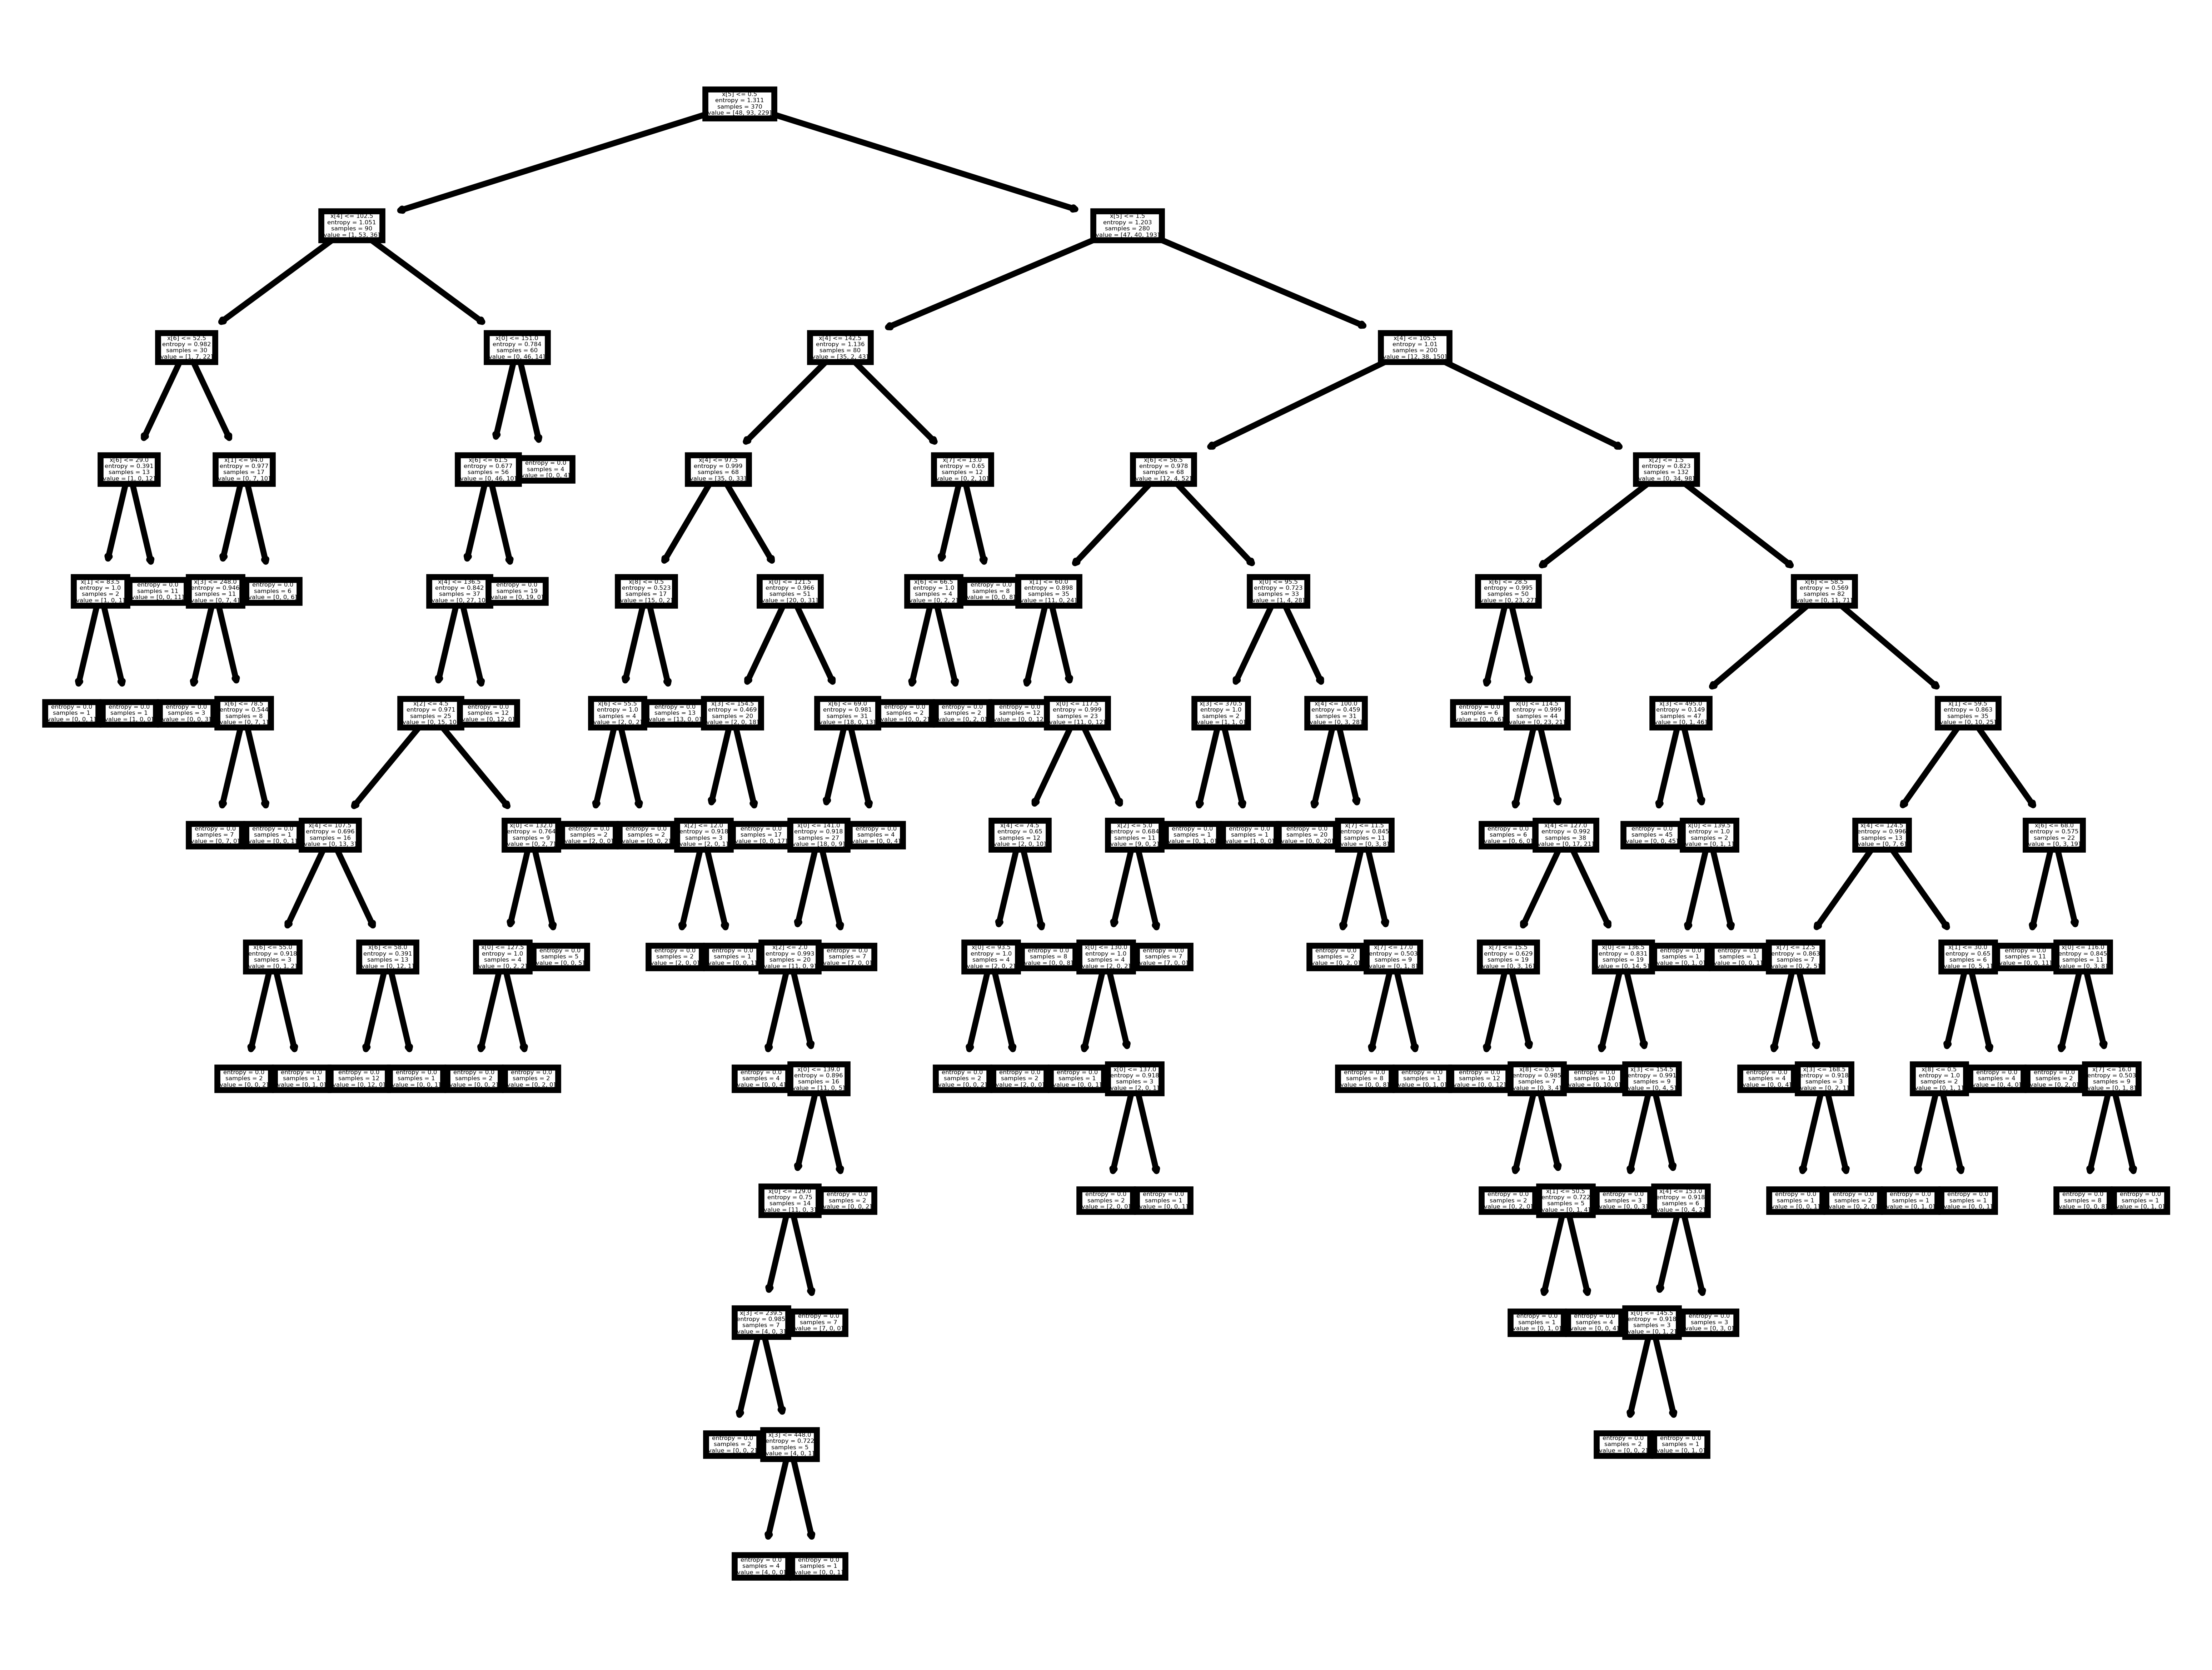

In [27]:
#PLot the decision tree
import matplotlib.pyplot as plt
plt.figure(dpi=1200)
tree1 = plot_tree(model1)

In [ ]:
Q 2) Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [28]:
import pandas as pd

In [29]:
fraud = pd.read_csv("Fraud_check.csv")

In [30]:
fraud.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [31]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [32]:
fraud['income_status'] = fraud['Taxable.Income'].apply(lambda x: 'Risky' if x <= 30000 else 'good')

In [34]:
fraud['income_status']

0      good
1      good
2      good
3      good
4      good
       ... 
595    good
596    good
597    good
598    good
599    good
Name: income_status, Length: 600, dtype: object

In [35]:
fraud1=pd.get_dummies(fraud)

In [36]:
fraud1

Taxable.Income  City.Population  Work.Experience  Undergrad_NO  \
0             68833            50047               10             1   
1             33700           134075               18             0   
2             36925           160205               30             1   
3             50190           193264               15             0   
4             81002            27533               28             1   
..              ...              ...              ...           ...   
595           76340            39492                7             0   
596           69967            55369                2             0   
597           47334           154058                0             1   
598           98592           180083               17             0   
599           96519           158137               16             1   

     Undergrad_YES  Marital.Status_Divorced  Marital.Status_Married  \
0                0                        0                       0   
1                1                        1                       0   
2                0                        0                       1   
3                1                        0                       0   
4                0                        0                       1   
..             ...                      ...                     ...   
595              1                        1                       0   
596              1                        1                       0   
597              0                        1                       0   
598              1                        0                       1   
599              0                        1                       0   

     Marital.Status_Single  Urban_NO  Urban_YES  income_status_Risky  \
0                        1         0          1                    0   
1                        0         0          1                    0   
2                        0         0          1                    0   
3                        1         0          1                    0   
4                        0         1          0                    0   
..                     ...       ...        ...                  ...   
595                      0         0          1                    0   
596                      0         0          1                    0   
597                      0         0          1                    0   
598                      0         1          0                    0   
599                      0         1          0                    0   

     income_status_good  
0                     1  
1                     1  
2                     1  
3                     1  
4                     1  
..                  ...  
595                   1  
596                   1  
597                   1  
598                   1  
599                   1  

[600 rows x 12 columns]

In [37]:
x=fraud1.iloc[:,1:]
y=fraud1['Taxable.Income']

In [38]:
# PREPARING MODEL

In [39]:
import numpy as np
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [42]:
model = DecisionTreeClassifier(max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [43]:
import matplotlib.pyplot as plt

In [45]:
plt.figure(dpi=3000)
tree.plot_tree(model);

In [46]:
y_pred=model.predict(X_test)

In [47]:
y_pred

array([11804, 35922, 31409, 33356, 16690, 11794, 10003, 31521, 11865,
       12453, 10379, 28496, 10163, 10163, 35922, 59689, 12453, 11865,
       31417, 12453, 30714, 32467, 59689, 12453, 11865, 11865, 12453,
       12453, 14398, 10163, 12453, 12453, 31417, 71572, 10163, 30167,
       14398, 28496, 31409, 10163, 33356, 12453, 10003, 32467, 31409,
       11794, 31521, 59689, 11865, 35922, 35922, 10003, 10163, 14398,
       10379, 17183, 31521, 10163, 10870, 31521, 33356, 35922, 14398,
       59689, 12453, 12453, 30714, 33356, 11865, 35922, 12453, 31417,
       30714, 12453, 32467, 30167, 30167, 31521, 11865, 30714, 11865,
       12453, 33356, 11865, 31521, 30714, 30167, 35922, 31417, 31521,
       28496, 14398, 33356, 35922, 59689, 14398, 10003, 32467, 30167,
       31417, 31409, 30167, 59689, 33356, 11794, 10379, 10163, 32467,
       32467, 71164, 10163, 30714, 11794, 31417, 30167, 35922, 10163,
       35922, 32467, 11865], dtype=int64)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       10003       0.00      0.00      0.00       0.0
       10163       0.00      0.00      0.00       0.0
       10329       0.00      0.00      0.00       1.0
       10379       0.00      0.00      0.00       0.0
       10735       0.00      0.00      0.00       1.0
       10870       0.00      0.00      0.00       0.0
       11794       0.00      0.00      0.00       0.0
       11804       0.00      0.00      0.00       0.0
       11865       0.00      0.00      0.00       0.0
       12453       0.00      0.00      0.00       0.0
       12470       0.00      0.00      0.00       1.0
       14398       0.00      0.00      0.00       0.0
       15491       0.00      0.00      0.00       1.0
       15673       0.00      0.00      0.00       1.0
       16690       0.00      0.00      0.00       0.0
       17183       0.00      0.00      0.00       0.0
       17783       0.00      0.00      0.00       1.0
       18572       0.00    

C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abhis\anaconda3\lib\site-packages\sklearn\metrics\_cla